•	Should Media Contacts recommend a uniform strategy for Air France across search engine publishers? Or would it be more effective to tailor each publisher strategy to maximize return on investment?

•	How can campaigns be improved to increase overall value gained from investment with a search engine publisher? Should keywords be added or dropped from the campaign? Should campaign tactics or copy be adjusted to improve campaign performance?

•	What are the most important KPIs, and what impact will campaign changes have on these KPIs?

•	How should future SEM campaigns be structured? In the past, Media Contacts had concentrated on Google, Microsoft, and Yahoo; was there now an opportunity to optimize search advertising with metasearch companies such as Kayak?


In [1]:
#importing data and pips

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_new=pd.read_csv("Assignment 1.csv")
df = df_new.drop(columns=["Publisher ID", "Keyword ID"])
empty_dict = {}
cringe = []

In [10]:
df.iloc[:, 21:30]

,Revenue Per Booking,Cost Per Booking,Profit Per Booking,Total Profit,ROA,Probability of Booking
0,"$1,175",$30.38,"$1,144.54","$502,455.09",$38.67,23.30%
1,"$1,348",$42.61,"$1,305.28",549524.05,$31.63,25.98%
2,"$1,146",$66.36,"$1,079.31","$249,321.16",$17.26,52.47%
3,"$1,297",$206.20,"$1,091.17","$244,421.46",$6.29,5.81%
4,$995,$11.07,$983.96,"$214,503.24",$89.91,27.66%
...,...,...,...,...,...,...
4505,0,$0.00,$0.00,-$5.29,0,0.00%
4506,0,$0.00,$0.00,-$5.30,0,0.00%
4507,0,$0.00,$0.00,-$5.48,0,0.00%
4508,0,$0.00,$0.00,-$5.86,0,0.00%


In [5]:
#test


for i in range(10, len(df.columns)):
    try:
        empty_dict[df.columns[i]] = df.iloc[:, i].mean()
    except TypeError:
        empty_dict[df.columns[i]] = "This is a string"
        cringe.append(df.columns[i])  # Append the column name directly, not as a list
empty_dict

{'Clicks': 113.71374722838138,
 'Click Charges': 167.4761973392461,
 'Avg. Cost per Click': 1.8908603104212862,
 'Impressions': 9283.519733924612,
 'Engine Click Thru %': 11.141456762749446,
 'Avg. Pos.': 1.9297250554323728,
 'Transaction\nconversion rate': 0.5692660753880266,
 'Total Cost/ Trans.': 27.60743458980044,
 'Revenue': 1033.6834922394678,
 'Total Cost': 167.4761973392461,
 'Total Volume of Bookings': 0.8733924611973393,
 'Revenue Per Booking': 83.57649667405765,
 'Cost Per Booking': 27.607472283813742,
 'Profit Per Booking': 55.96855432372505,
 'Total Profit': 866.2073015521065,
 'ROA': 4.415036593479708,
 'Probability of Booking': 6.809527716186252}

In [4]:

def fix_columns(col):
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].str.replace(',', '') 
    df[col] = df[col].str.replace('%', '')
  

    
    #need to remember .str.replace only works on columns with all string, there might be some floats and empty strings 
    # Handle empty strings and existing floats
    #df[col] = df[col].apply(lambda x: float(x) if isinstance(x, str) and x.strip() != '' else np.nan)
    
    df[col] = pd.to_numeric(df[col], errors='coerce')
   
#[col].apply(...): The .apply() method is used to apply a function to each value in the column df[col].

#Lambda x: float(x) if isinstance(x, str) and x.strip() != '' else np.nan: 
#A lambda function is defined to handle the transformation of each value in the column. 
#It takes a value x as input and performs the following logic:
#Float(x): If x is a string (isinstance(x, str)) and it is not an empty string (x.strip() != ''), it converts x to a float 
#using the float() function.np.nan: If the conditions mentioned above are not met (i.e., x is not a string or it is an 
#empty string), it assigns np.nan, which represents a missing or undefined value, to the value.
    
    
    
    
# Iterate over the cringe list and apply the fix_columns function
for col in cringe:
    fix_columns(col)



C:\Users\Eric\AppData\Local\Temp\ipykernel_11980\3042241873.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '')


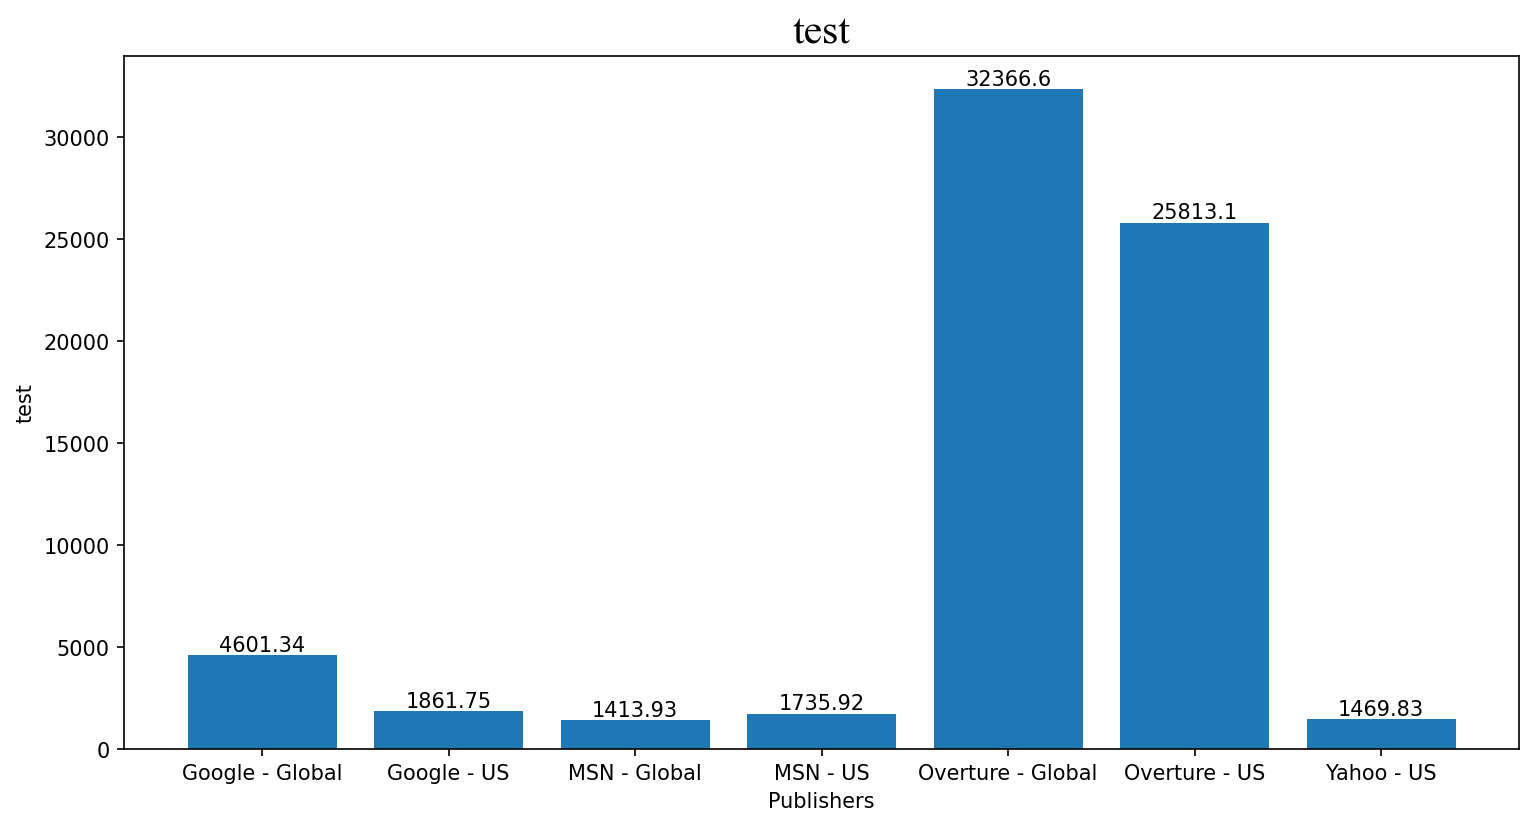

In [6]:
labels = df["Publisher Name"]
values=df["Impressions"].mean()


# Calculate the mean revenue for each publisher
mean_revenues = df.groupby('Publisher Name')["Impressions"].mean()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)

# Set the y-tick positions
yticks = np.arange(0,3000,500)


# Create the bar chart
bars = ax.bar(mean_revenues.index, mean_revenues.values)

# Add axis and title label
plt.title('test',
            fontdict = {'fontname':"Times New Roman", "fontsize":20 }
         )

plt.xlabel('Publishers')
plt.ylabel('test')

# Add value labels to each bar
ax.bar_label(bars)

# Display the chart
plt.show()

# Graphs of Sum of Gross Values


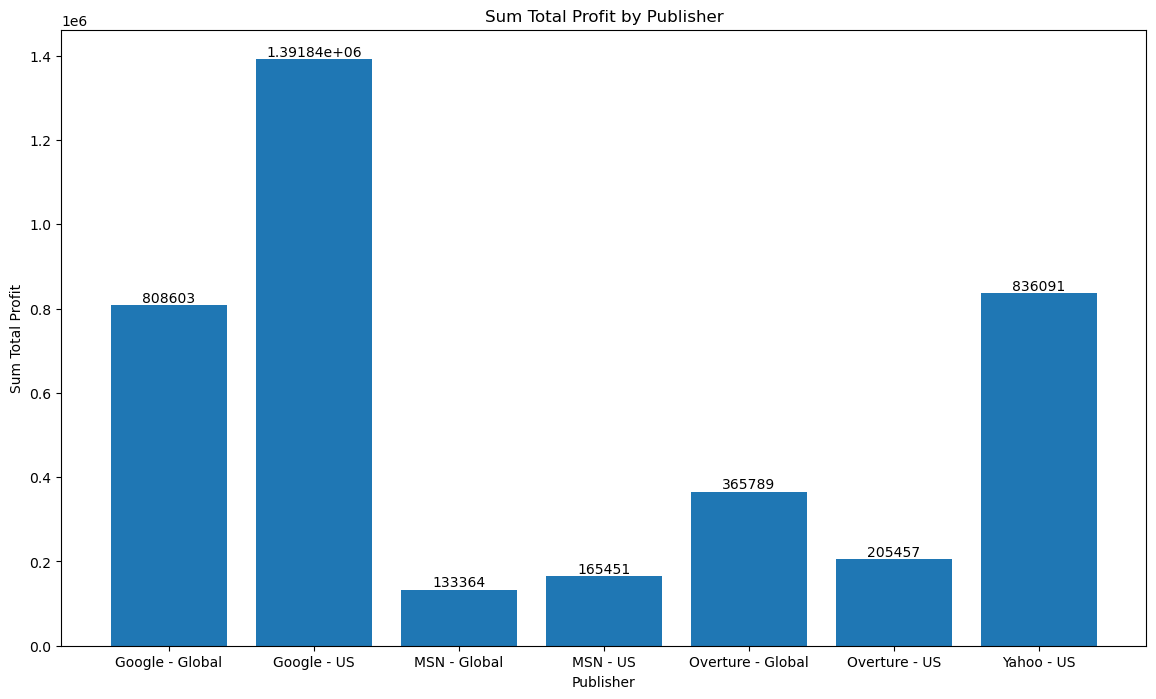

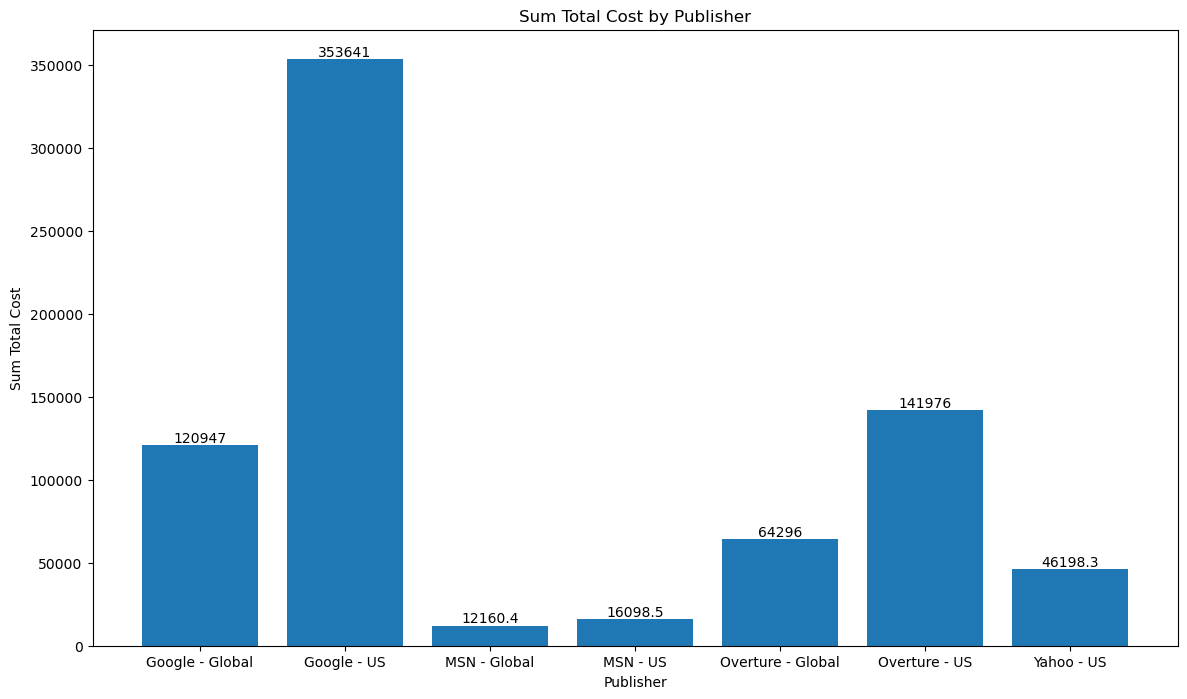

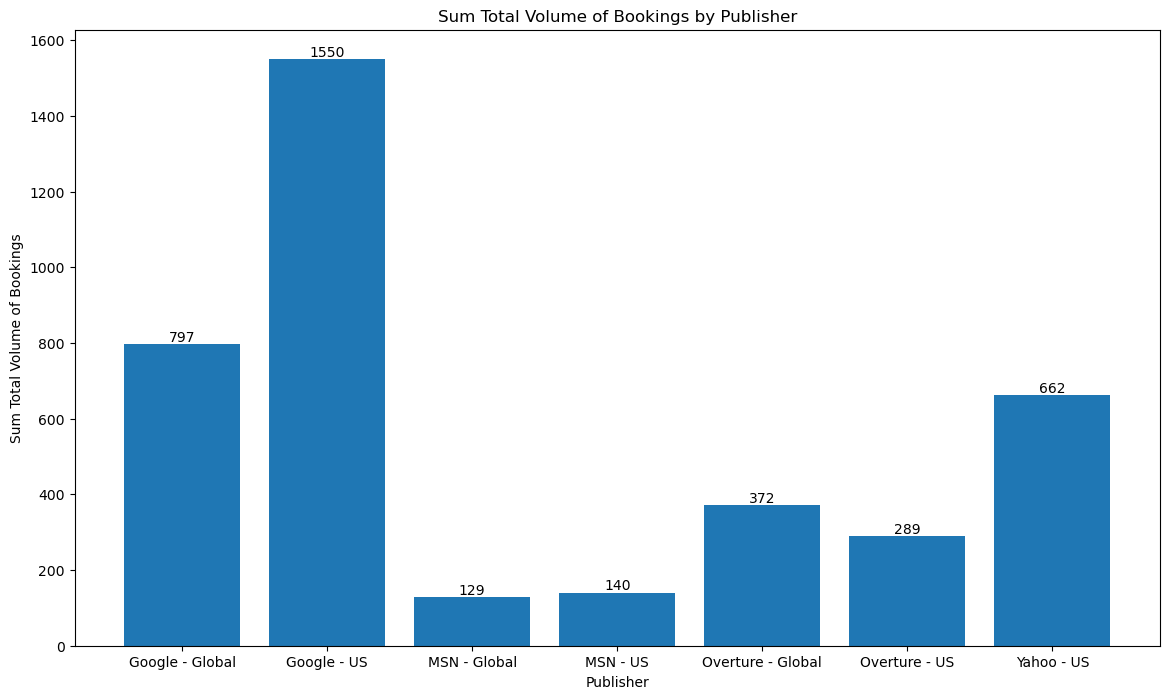

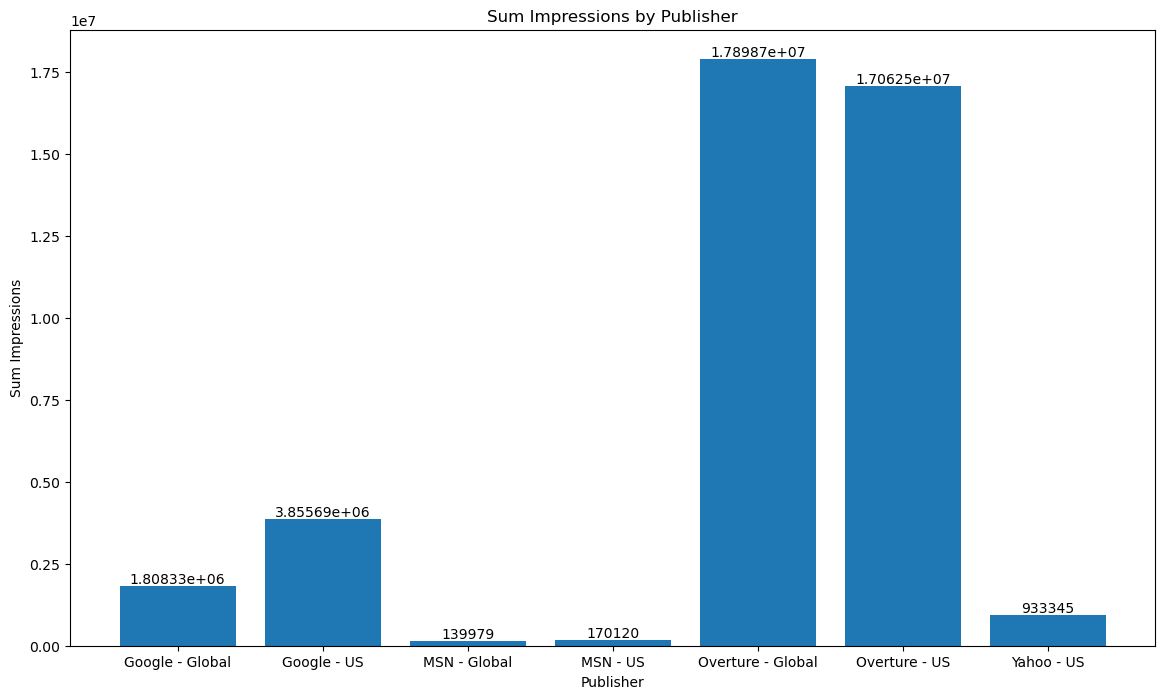

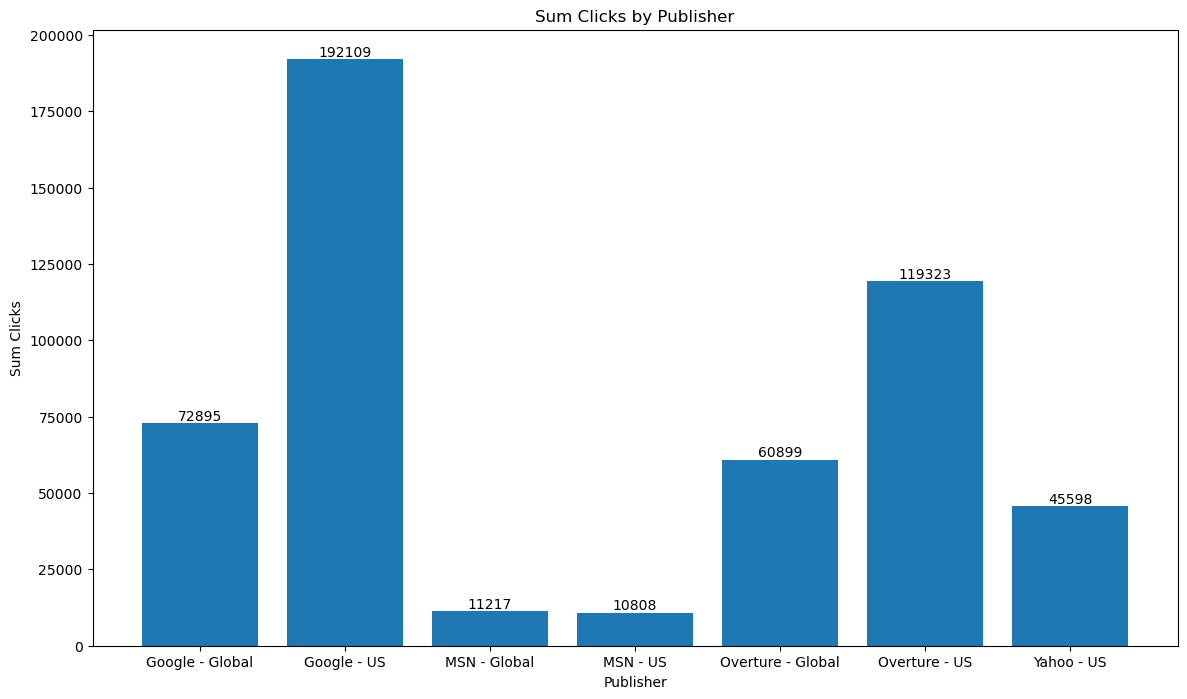

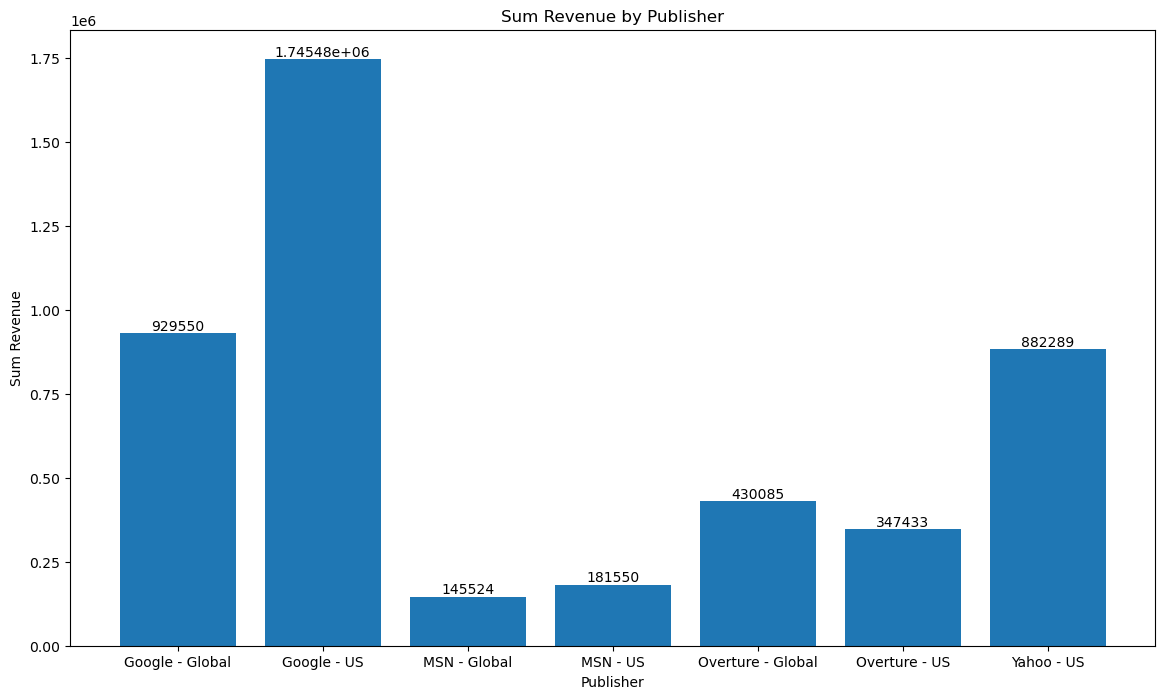

In [7]:
#these are the values that make make sense to show the gross amount of
#it will be important to show the cost and volume in a later graph b/c if they are dumping tons of resources to ge this large
#outcome it won't be the bets

absolute_sum = ["Total Profit","Total Cost","Total Volume of Bookings","Impressions","Clicks","Revenue"]

for column_name in absolute_sum :
    # Calculate the sum for each publisher
    sum_values = df.groupby('Publisher Name')[column_name].sum()
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(sum_values.index, sum_values.values)
    ax.set_xlabel('Publisher')
    ax.set_ylabel('Sum ' + column_name)
    ax.set_title('Sum ' + column_name + ' by Publisher')
    ax.bar_label(bars)
    plt.show()

# Graph of Per Keyword

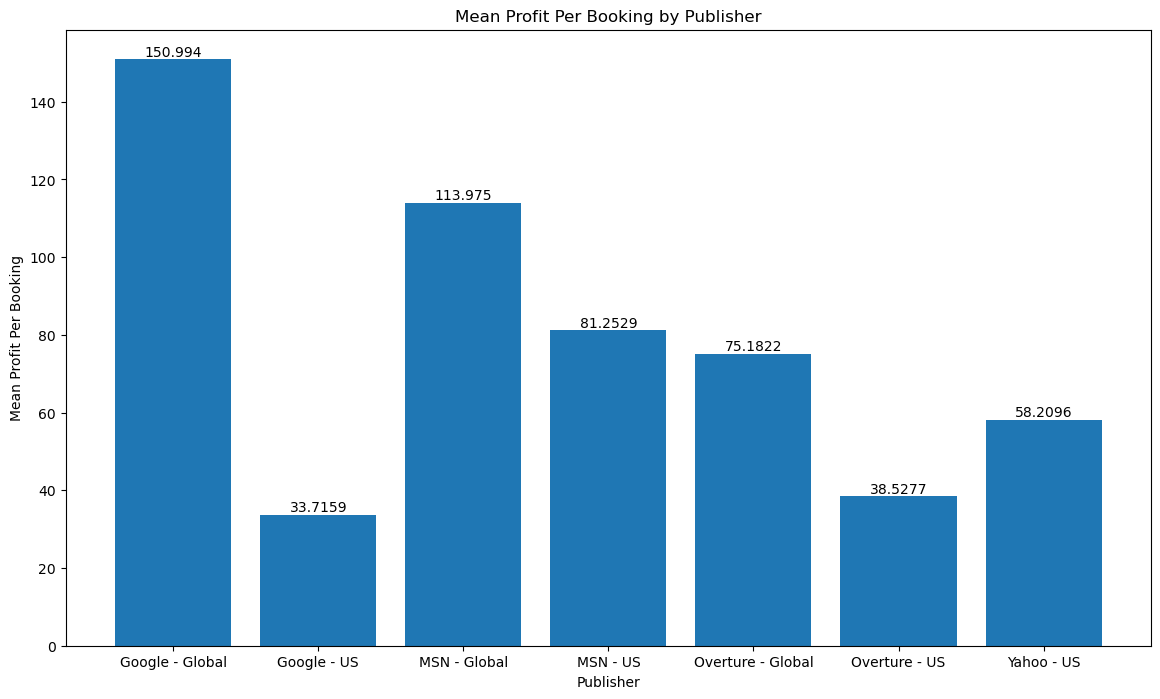

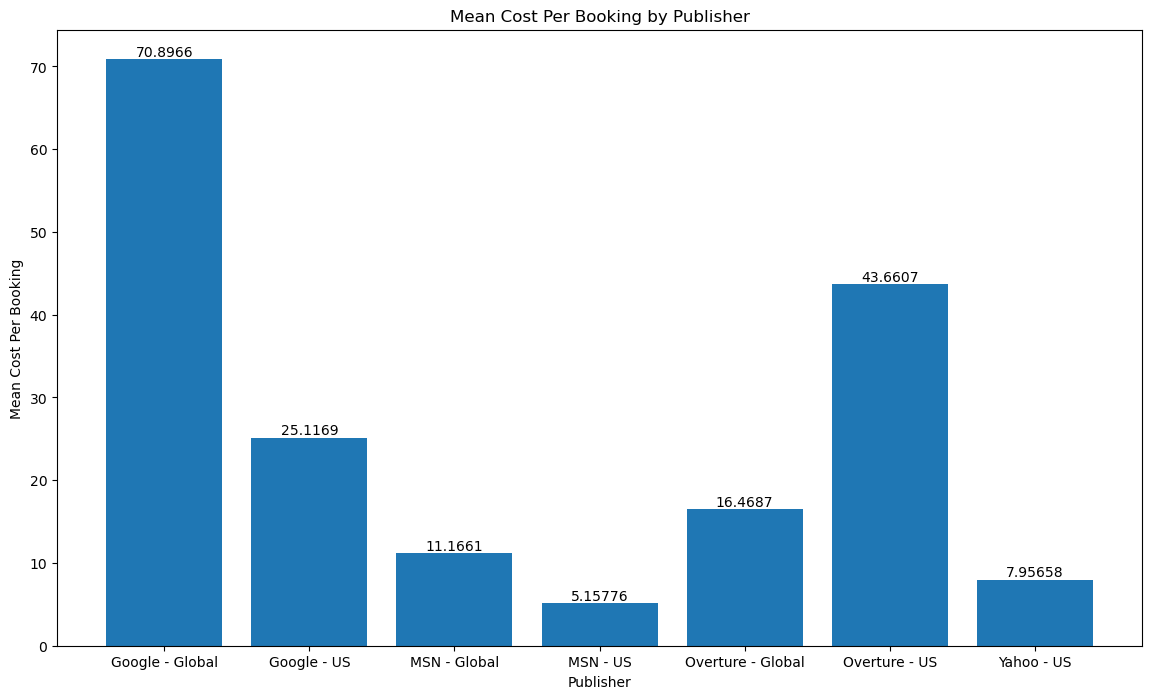

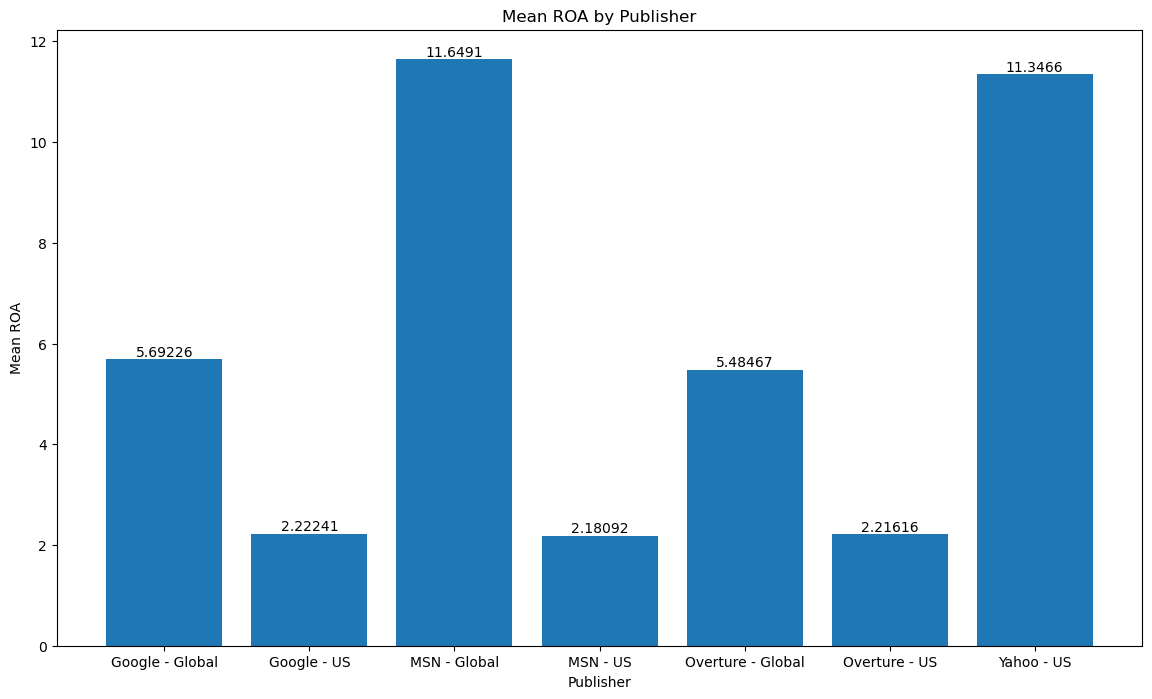

In [8]:
average_keyword = ["Profit Per Booking", "Cost Per Booking", "ROA"]

for column_name in average_keyword:
    # Calculate the mean for each publisher
    mean_values = df.groupby('Publisher Name')[column_name].mean()

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(mean_values.index, mean_values.values)
    ax.set_xlabel('Publisher')
    ax.set_ylabel('Mean ' + column_name)
    ax.set_title('Mean ' + column_name + ' by Publisher')
    ax.bar_label(bars)
    plt.show()

# Conversion Funnel

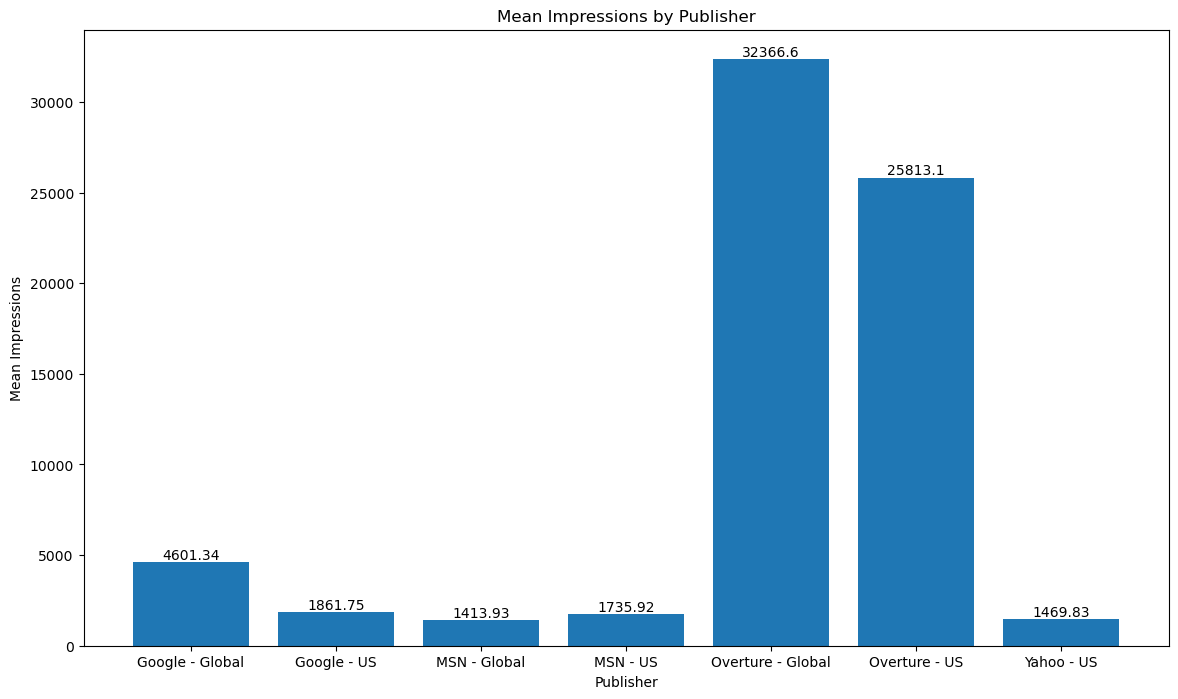

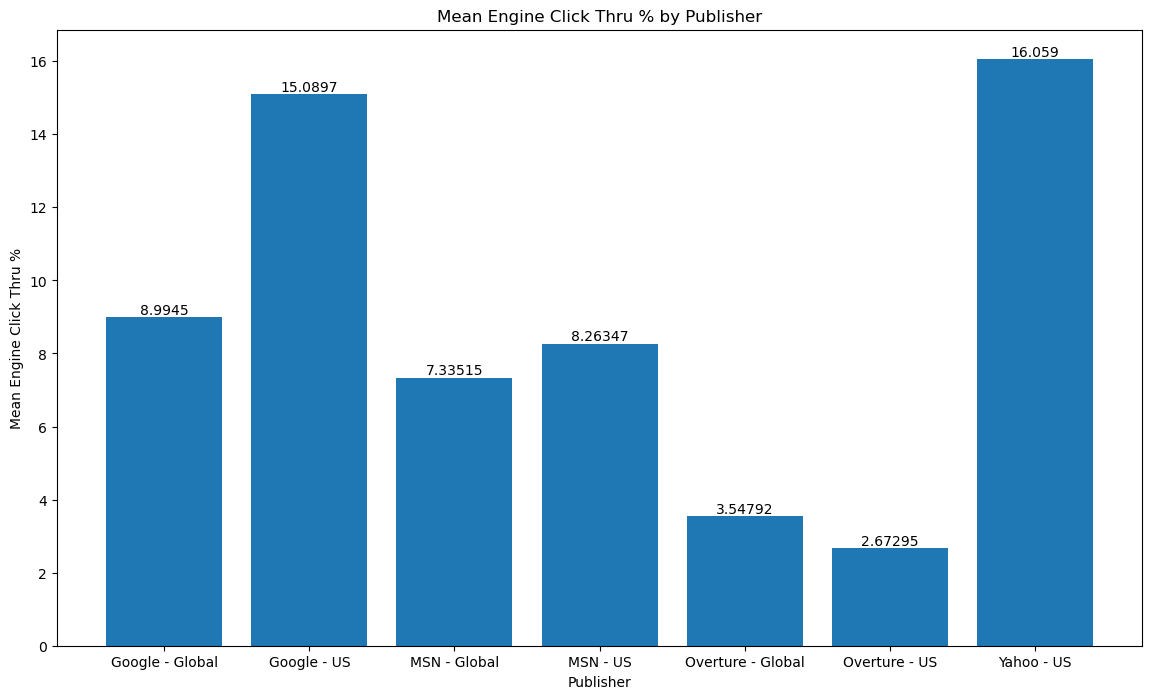

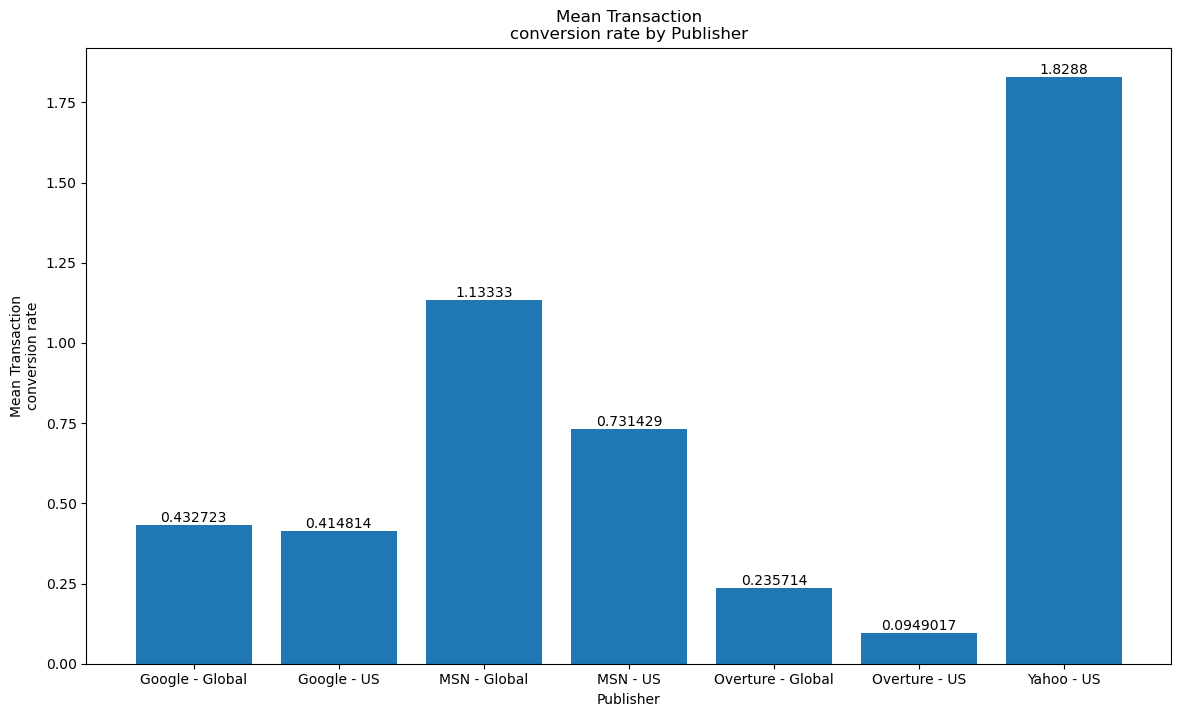

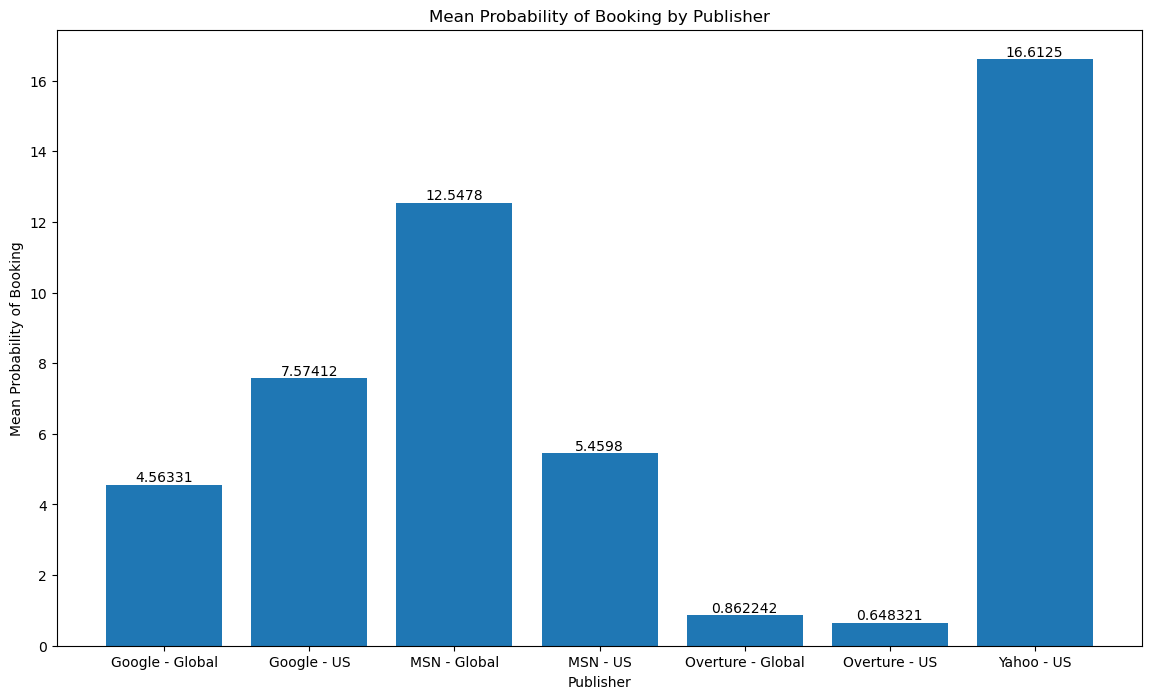

In [19]:
#these are the values that make make sense to show the gross amount of
#it will be important to show the cost and volume in a later graph b/c if they are dumping tons of resources to ge this large
#outcome it won't be the bets

average_keyword = ["Impressions","Engine Click Thru %",  "Transaction\nconversion rate", "Probability of Booking"]

for column_name in average_keyword:
    # Calculate the mean for each publisher
    mean_values = df.groupby('Publisher Name')[column_name].mean()

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(mean_values.index, mean_values.values)
    ax.set_xlabel('Publisher')
    ax.set_ylabel('Mean ' + column_name)
    ax.set_title('Mean ' + column_name + ' by Publisher')
    ax.bar_label(bars)
    plt.show()

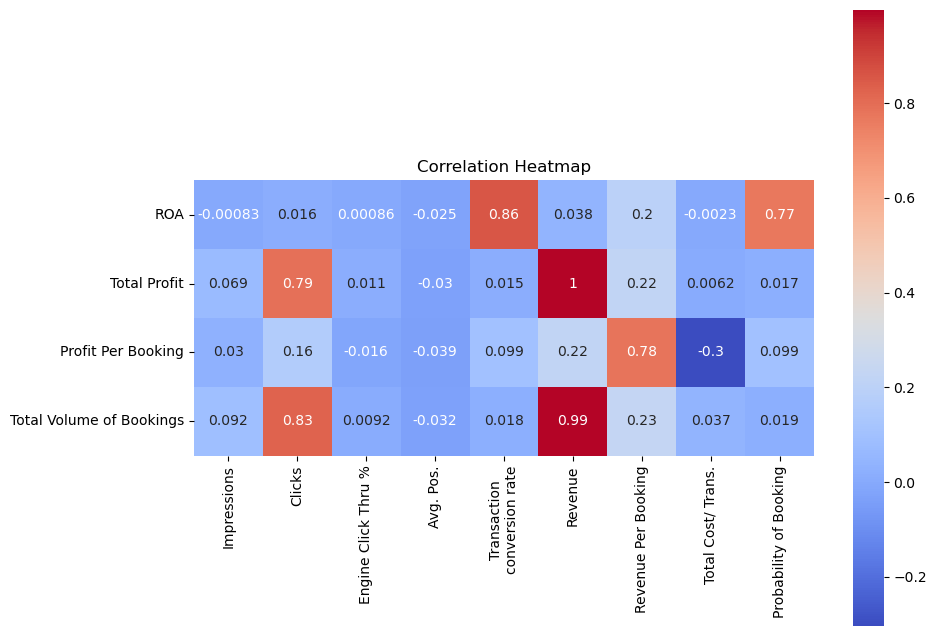

In [9]:
#which kpi best explains the results we want
import seaborn as sns
KPI = ["Impressions","Clicks","Engine Click Thru %","Avg. Pos.","Transaction\nconversion rate", "Revenue","Revenue Per Booking","Total Cost/ Trans.","Probability of Booking"]
Results = ["ROA","Total Profit","Profit Per Booking","Total Volume of Bookings"]

# Create an empty DataFrame for correlations
correlation_df = pd.DataFrame(index=KPI, columns=Results)

# Create an empty DataFrame for correlations
correlation_df = pd.DataFrame(index=KPI, columns=Results)

# Calculate correlations between specific pairs of columns
for kpi_col in KPI:
    for results_col in Results:
        correlation = df[kpi_col].corr(df[results_col])
        correlation_df.at[kpi_col, results_col] = correlation

# Convert correlation values to numeric type
correlation_df = correlation_df.astype(float)

# Transpose the correlation DataFrame
correlation_df = correlation_df.T

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", square=True)

# Set plot title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [11]:
import pandas as pd
from scipy import stats

# Finding unique words
word_list = df["Keyword"].unique()

unique_words = set()  # Empty set to store unique words

# Iterate over each string in the list
for string in word_list:
    # Split the string into individual words
    words = string.split()
    
    # Add each word to the set
    for word in words:
        unique_words.add(word)   
        
# Convert the set to a list
unique_words_list = list(unique_words)

# Calculate segment-wise averages
segment_results = []
for word in unique_words_list:
    segment_df = df[df['Keyword'].str.contains(word, regex=False)]
    roa = segment_df['ROA'].mean()
    if roa != 0:  # Filter out segments with ROA equal to 0
        keyword_count = len(segment_df)
        segment_results.append({'Segment': word, 'ROA': roa, 'Keyword Count': keyword_count})

segment_results_df = pd.DataFrame(segment_results)

# Print the segment results
print(segment_results_df.head(50))

                Segment         ROA  Keyword Count
0                    de    0.252558            215
1           reservation    2.955294             17
2                ticket    2.654824            937
3              florence   45.819647             85
4         international    7.172682            384
5               website   39.516667              6
6                 class    0.003333             27
7                 india    0.136087             23
8            casablanca    4.090000              3
9               tickets    1.042801            332
10                  web   23.695333             15
11                franc   11.168903            839
12               athens    0.164495            109
13               france   11.303631            829
14             airlines    2.446735            147
15                 line    3.154265            558
16             business    0.002727             33
17              bargain    0.356364             11
18                 lyon    1.77

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Calculate the mean ROA of all keywords
mean_roa = df['ROA'].mean()

# Perform Tukey HSD test
tukey_result = pairwise_tukeyhsd(
    endog=df['ROA'],  # Outcome variable (ROA)
    groups=df['Keyword'],  # Grouping variable (Keyword)
    alpha=0.05  # Significance level (default is 0.05)
)

# Create a DataFrame to store the Tukey test results
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# Print the Tukey test results
print("Tukey HSD Test Results:")
print(tukey_df)


In [12]:
#can check the highest or loweset ROA keywords

sorted_df = segment_results_df.sort_values('ROA', ascending=False)

# Print the sorted DataFrame
print(sorted_df.head(50))

                 Segment         ROA  Keyword Count
79           [airfrance]  720.840000              1
109        airfrance,com  222.185000              2
110                 [air  206.265000              4
36               france]  206.265000              4
27          airfrance.us  158.162500              4
22            france,com  148.123333              3
20      campaign::france  117.840000              1
43                   low  104.946667             24
45                 phone   97.580000              1
87                number   97.580000              1
32   2006::google|europe   91.070000              1
33                online   70.833333              6
108                tunis   64.130000              2
112           france.com   63.702000             10
101                 .com   57.910909             11
100                  com   52.134483             29
75                 rabat   49.820000              2
106     airfrance.com/us   47.240000              3
3           

In [13]:
#convert bid strategy to int which I realise isn't necessary but I will do regardless, might be useful if you want to see if 
#like starting with 1 or ending with 4 is better or worse



import re


# Replace NaN values with 0
df["Bid Strategy"].fillna(0, inplace=True)

# Function to transform the values to x.y format
def transform_bid_strategy(value):
    if value == 0:
        return value
    else:
        pattern = r'(\d+)\D+(\d+)'
        match = re.search(pattern, value)
        if match:
            return float(f"{match.group(1)}.{match.group(2)}")
        else:
            return 0

# Apply the transformation function to the column
df["Bid Strategy"] = df["Bid Strategy"].apply(transform_bid_strategy)

# Check to see if type is converted
q='Bid Strategy'
type_counts = {'int': 0, 'float': 0, 'str': 0}

for value in df[q]:
    if isinstance(value, int):
        type_counts['int'] += 1
    elif isinstance(value, float):
        type_counts['float'] += 1
    elif isinstance(value, str):
        type_counts['str'] += 1

print(type_counts)

x=df[q]
y=x[0]
print(y)

y_float = float(y)

variable_type = type(y_float).__name__

print("Type of my_variable:", variable_type)





print(df["Bid Strategy"].head(50))

{'int': 0, 'float': 4510, 'str': 0}
0.0
Type of my_variable: float
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.2
6     1.3
7     1.4
8     0.0
9     1.4
10    0.0
11    0.0
12    0.0
13    1.4
14    1.4
15    1.4
16    0.0
17    1.4
18    1.3
19    0.0
20    0.0
21    0.0
22    1.2
23    0.0
24    0.0
25    0.0
26    0.0
27    1.2
28    0.0
29    0.0
30    0.0
31    1.4
32    0.0
33    1.2
34    1.3
35    1.4
36    1.3
37    1.4
38    0.0
39    0.0
40    0.0
41    1.3
42    1.3
43    5.1
44    1.2
45    0.0
46    1.3
47    3.6
48    5.1
49    1.4
Name: Bid Strategy, dtype: float64


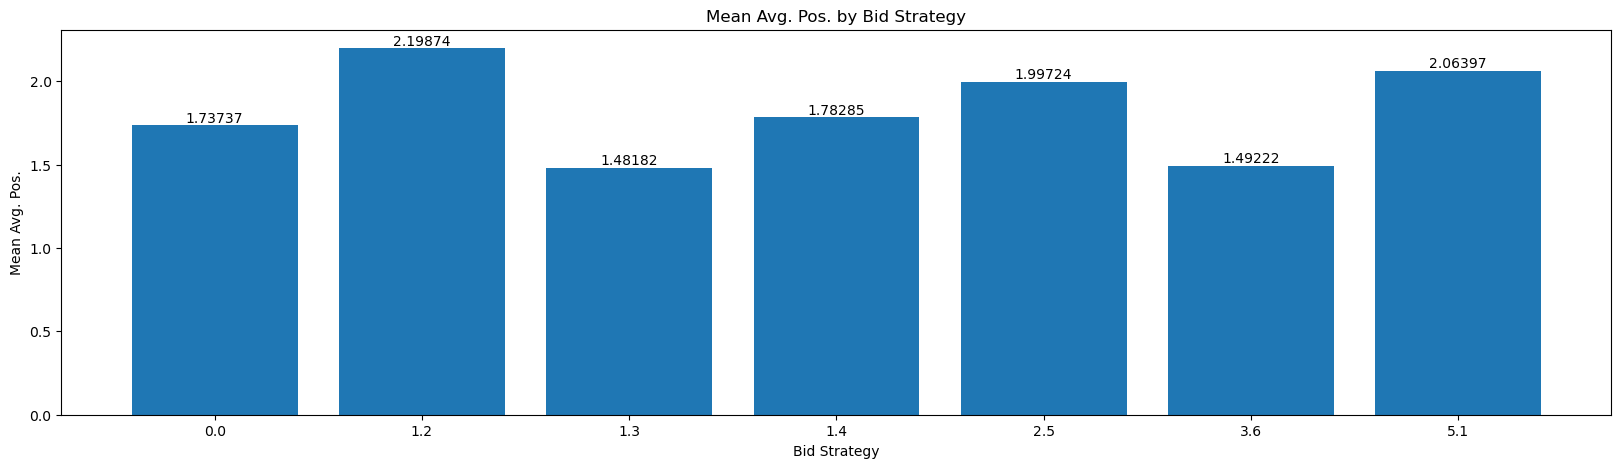

In [18]:
bid_types = df["Bid Strategy"].unique


#these are the values that make make sense to show the gross amount of
#it will be important to show the cost and volume in a later graph b/c if they are dumping tons of resources to ge this large
#outcome it won't be the bets
average_keyword = ["Avg. Pos."]

for column_name in average_keyword:
    # Calculate the mean for each bid type
    mean_values = df.groupby('Bid Strategy')[column_name].mean()

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(20, 5))
    bars = ax.bar(mean_values.index.astype(str), mean_values.values)
    ax.set_xlabel('Bid Strategy')
    ax.set_ylabel('Mean ' + column_name)
    ax.set_title('Mean ' + column_name + ' by Bid Strategy')
    ax.bar_label(bars)
    plt.show()

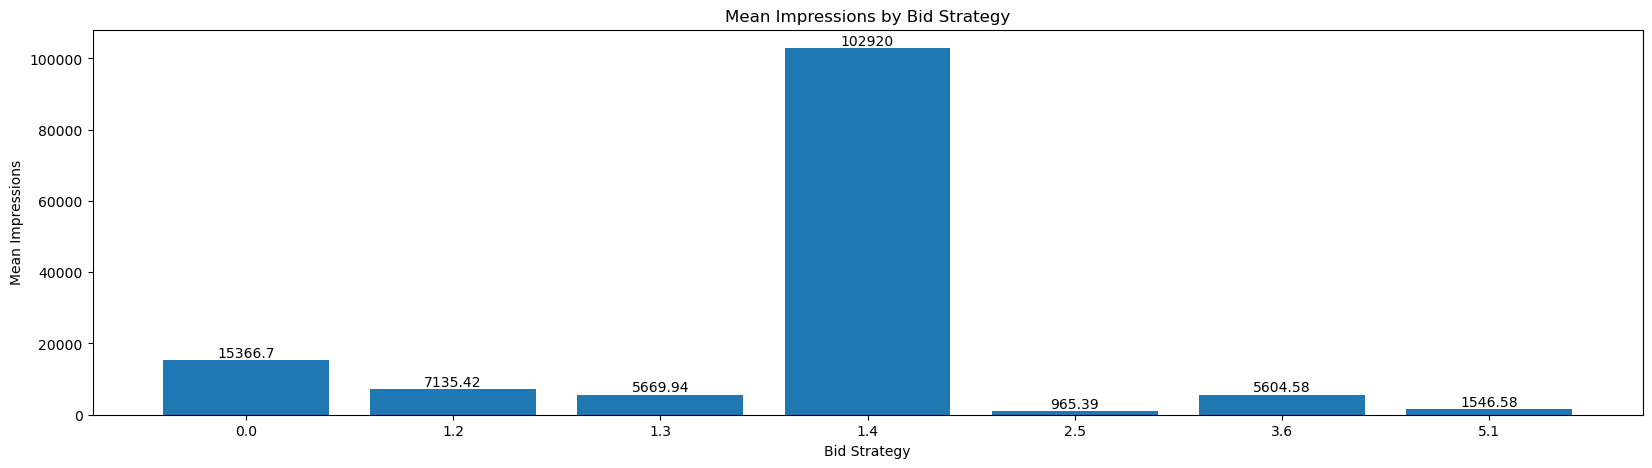

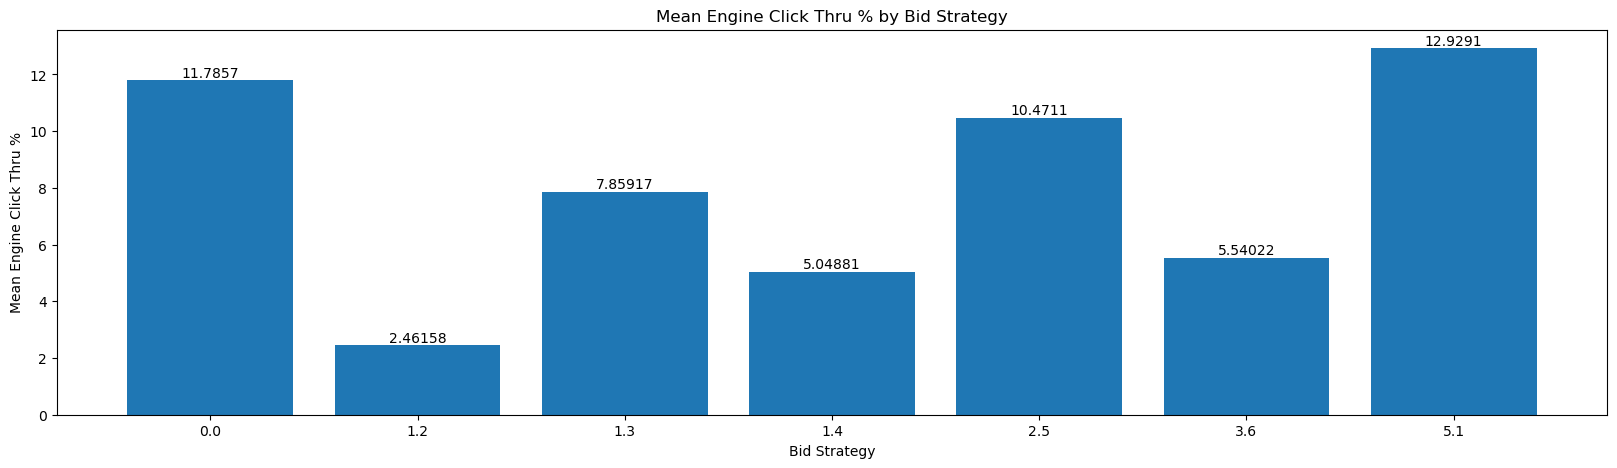

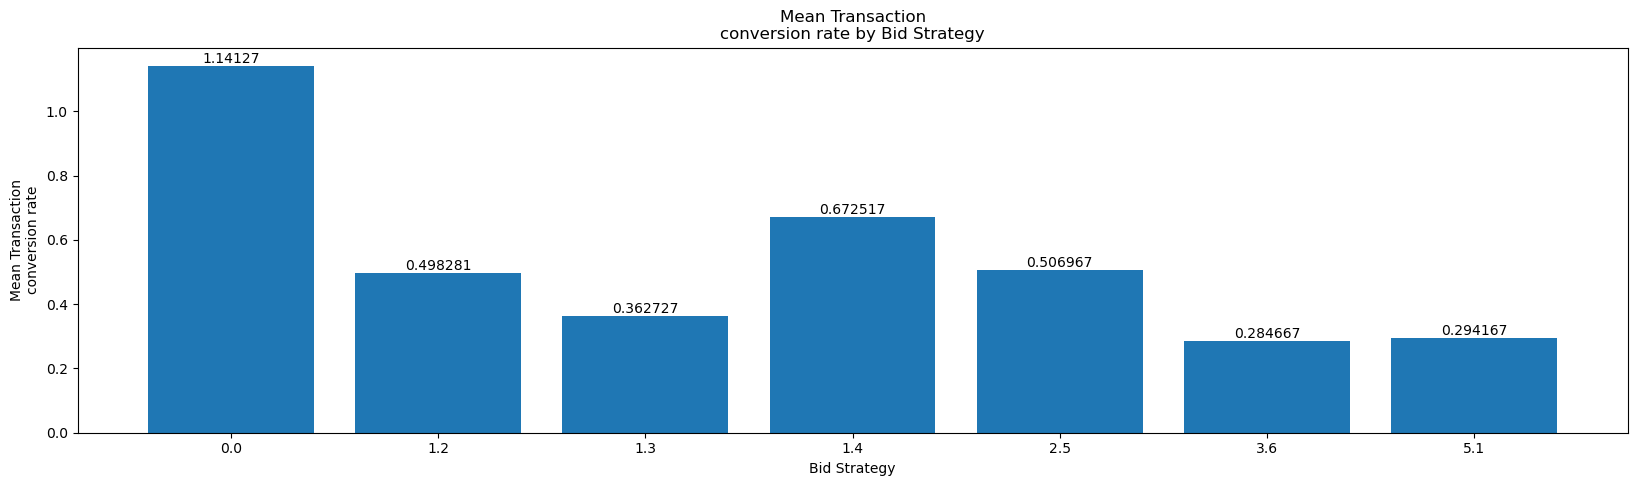

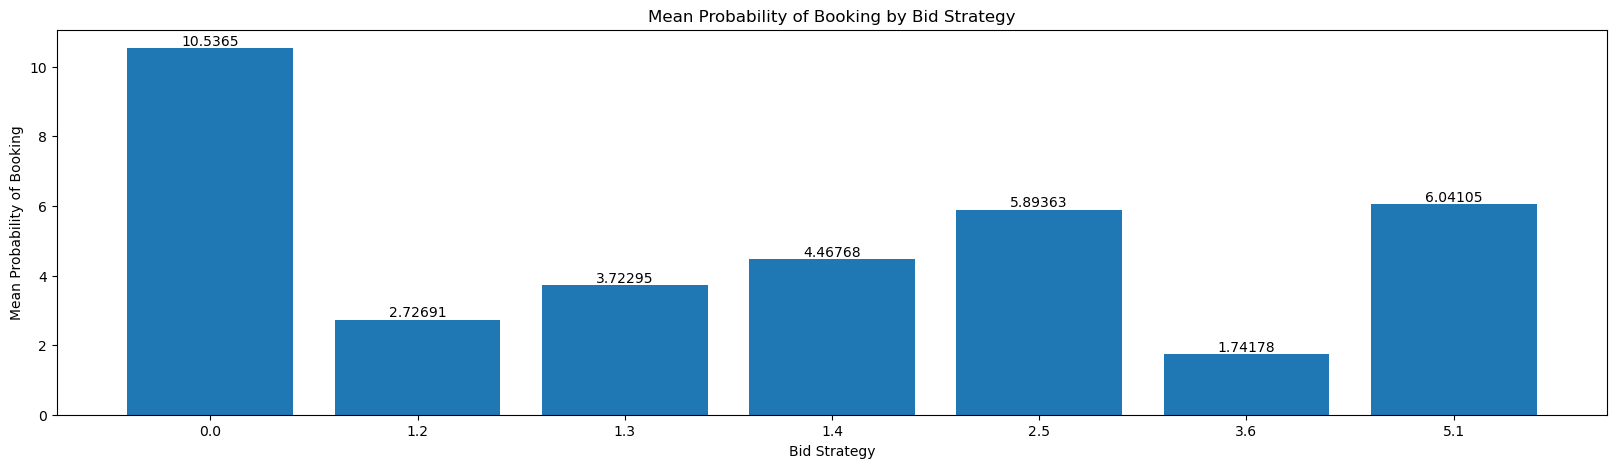

In [33]:
average_keyword = ["Impressions", "Engine Click Thru %", "Transaction\nconversion rate", "Probability of Booking"]

for column_name in average_keyword:
    # Calculate the mean for each bid strategy
    mean_values = df.groupby('Bid Strategy')[column_name].mean()

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(20, 5))
    bars = ax.bar(mean_values.index.astype(str), mean_values.values)
    ax.set_xlabel('Bid Strategy')
    ax.set_ylabel('Mean ' + column_name)
    ax.set_title('Mean ' + column_name + ' by Bid Strategy')
    ax.bar_label(bars)
    plt.show()

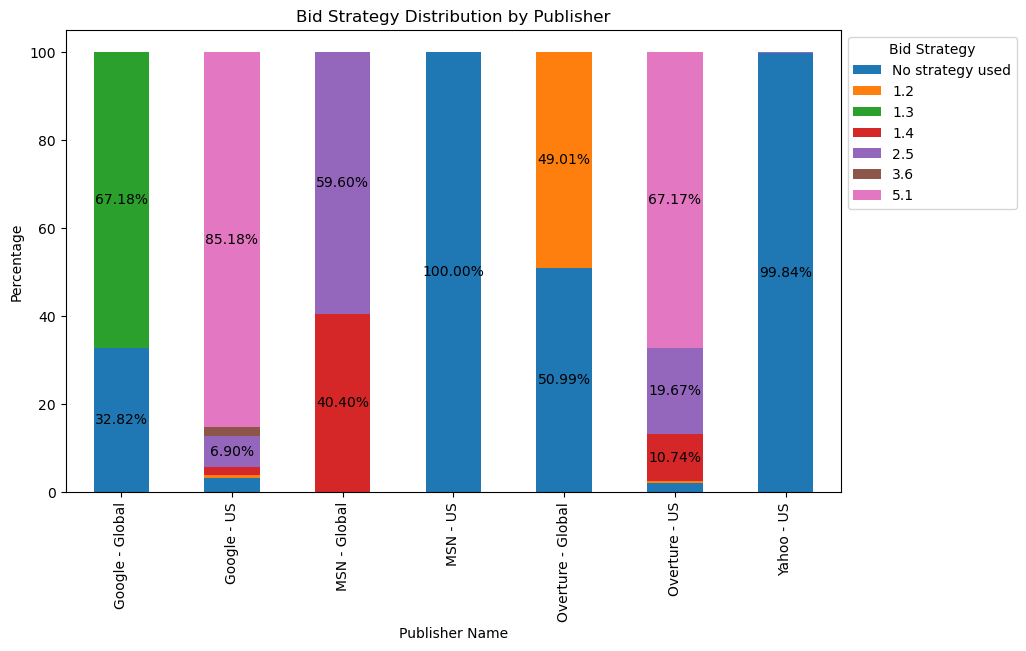

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by Bid Strategy and Publisher Name and count the frequencies
frequency_data = df.groupby(["Bid Strategy", "Publisher Name"]).size().unstack(fill_value=0)

# Calculate the percentages and round them to 2 decimal places
percentage_data = round(frequency_data.div(frequency_data.sum(axis=0), axis=1) * 100, 2)

# Transpose the DataFrame
percentage_data = percentage_data.T

# Create the stacked bar plot
ax = percentage_data.plot.bar(stacked=True, figsize=(10, 6))

# Set the title and labels for the plot
ax.set_title("Bid Strategy Distribution by Publisher")
ax.set_xlabel("Publisher Name")
ax.set_ylabel("Percentage")

# Update the legend label for bid strategy value of 0.0
legend = ax.legend(title="Bid Strategy", bbox_to_anchor=(1, 1))
legend_labels = legend.get_texts()
for label in legend_labels:
    if label.get_text() == "0.0":
        label.set_text("No strategy used")

        
        
    
# Add percentage labels to each segment if the value is over 6
for container in ax.containers:
    for rect in container:
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_y() + rect.get_height() / 2
        percentage = rect.get_height()
        if percentage > 6:
            ax.annotate(f"{percentage:.2f}%", (x, y), ha="center", va="center")

# Show the plot
plt.show()

In [75]:
x = df["Publisher Name"].unique()
y = df["Publisher Name"]
count_of_each = {}
percentage_of_each = {}

for publisher in y:
    count_of_each[publisher] = count_of_each.get(publisher, 0) + 1

    
    

    
    
for publisher in x:
    percentage_of_each[publisher] = round((count_of_each[publisher] / len(y)) * 100, 2)

data = {
    "Publishers": x,
    "Count": count_of_each.values(),
    "Percentage": percentage_of_each.values()
}

df_data = pd.DataFrame(data)

pivot_table_dict = df_data.pivot_table(index='Publishers', values=['Count', 'Percentage'])

# Sort by count from highest to lowest
pivot_table_dict = pivot_table_dict.sort_values(by='Count', ascending=False)

print(pivot_table_dict)

                   Count  Percentage
Publishers                          
Google - US         2071       45.92
Overture - US        661       14.66
Yahoo - US           635       14.08
Overture - Global    553       12.26
Google - Global      393        8.71
MSN - Global          99        2.20
MSN - US              98        2.17
